In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [19]:
df = pd.read_csv('Titanic-Dataset.csv')

In [20]:
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
df = df[features + ['Survived']]

In [21]:
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

In [22]:
label_encoders = {}
for column in ['Sex', 'Embarked']:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

In [23]:
X = df[features]
y = df['Survived']

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [25]:
model = DecisionTreeClassifier(max_depth=4, random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

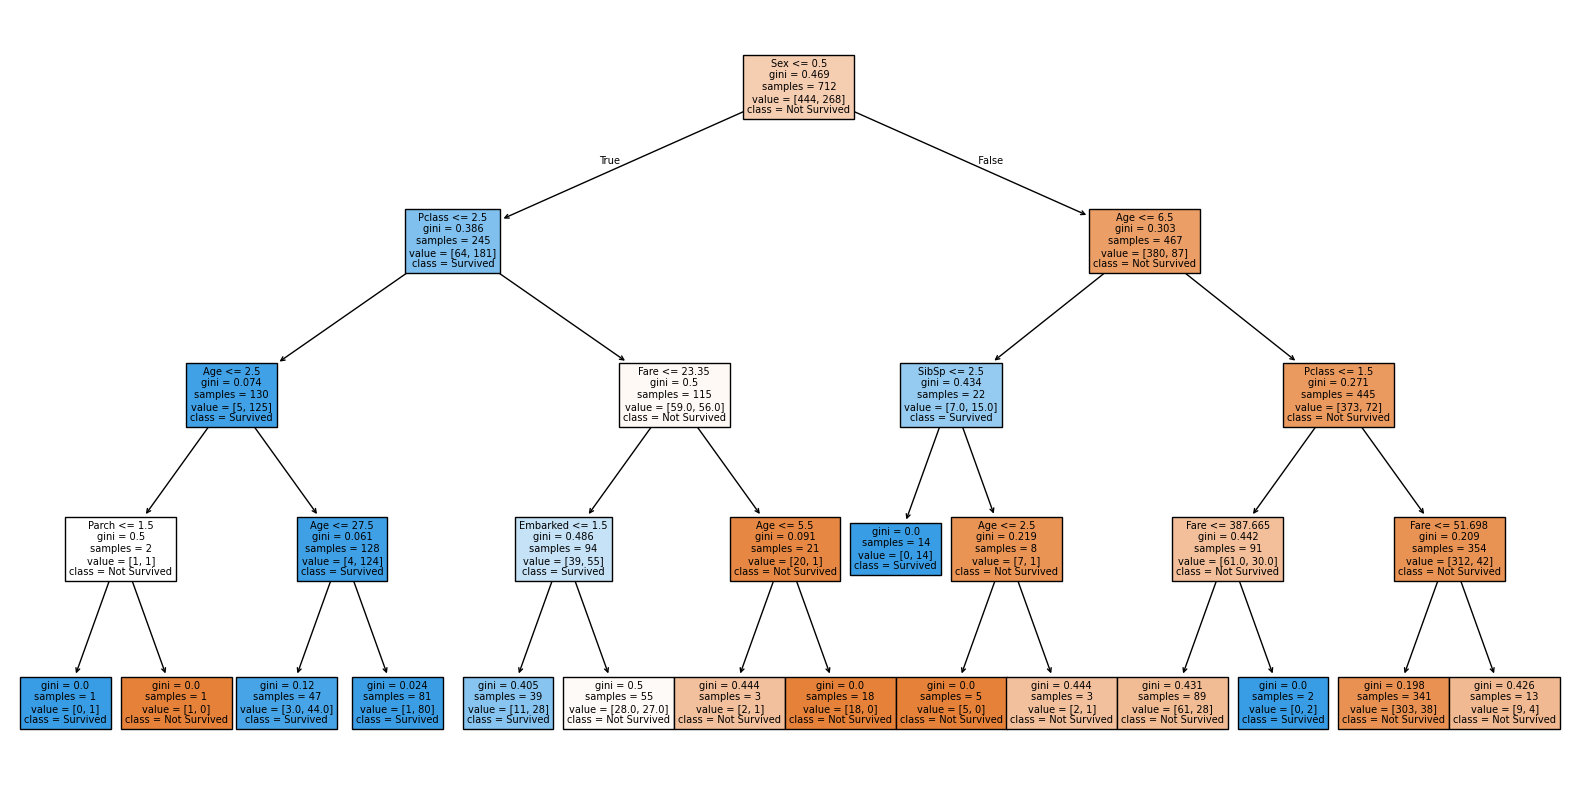

In [26]:
plt.figure(figsize=(20, 10))
plot_tree(model, feature_names=features, class_names=['Not Survived', 'Survived'], filled=True)
plt.show()

In [28]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Akurasi model: {accuracy:.2f}")

Akurasi model: 0.80
